# Chapter 8

#### Exercise 3 p332

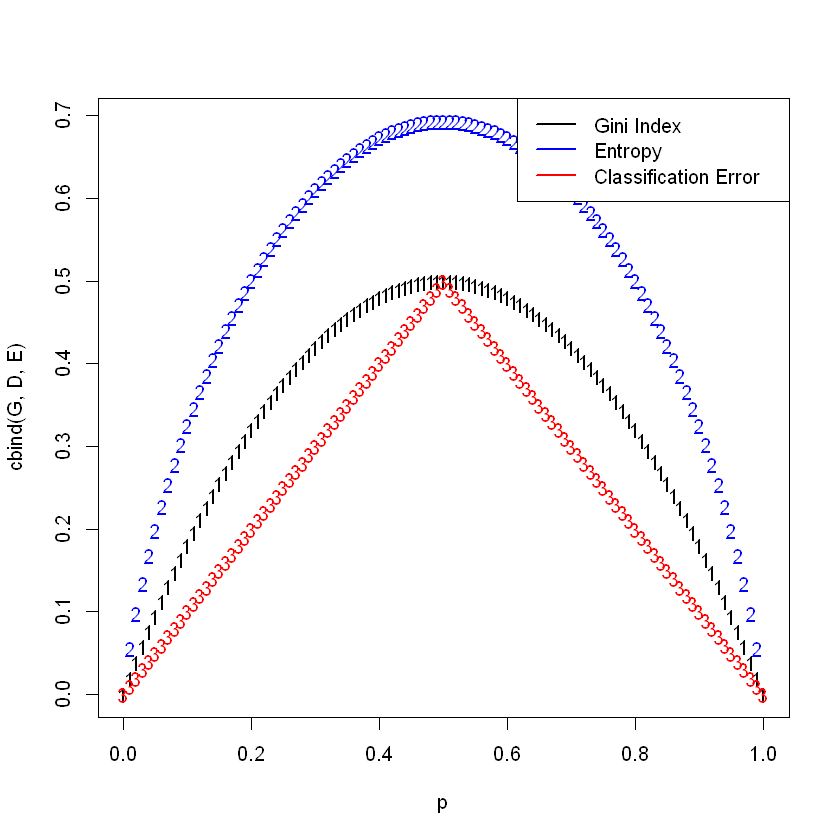

In [2]:
p <- seq(0, 1, 0.01)

# Gini index
G <- p * (1 - p) * 2 

# Classification error
E <- 1 - pmax(p, 1 - p)

# Entropy
D <- -(p * log(p) + (1 - p) * log(1 - p))

# Plot
matplot(p, cbind(G, D, E), col = c("black", "blue", "red"))
legend("topright",legend=c("Gini Index", "Entropy", "Classification Error"), 
       col=c("black", "blue", "red"),lty=c(1,1,1), lwd=c(2,2,2))

#### Exercise 5 p332

In [3]:
P = c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)

# Majority vote approach
print(sum(P>=0.5)>sum(P<0.5))
## interpretation : There is more red predictions (threshold = 50%)

# Average approach
print(mean(P))
## interpretation : There are more green predictions

[1] TRUE
[1] 0.45


#### Exercise 8 p333

In [12]:
# (a)
library(ISLR)
attach(Carseats)

The following objects are masked from Carseats (pos = 4):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US




In [13]:
# Splitting the data
set.seed(1)
split <- sample(c(rep(0, 0.7 * nrow(Carseats)), rep(1, 0.3 * nrow(Carseats))))
train <- Carseats[split == 0, ]    
test <- Carseats[split == 1, ]  

In [14]:
table(split) 

split
  0   1 
280 120 

In [15]:
# (b)
if(!require("tree")) install.packages("tree"); library("tree")
library(tree)

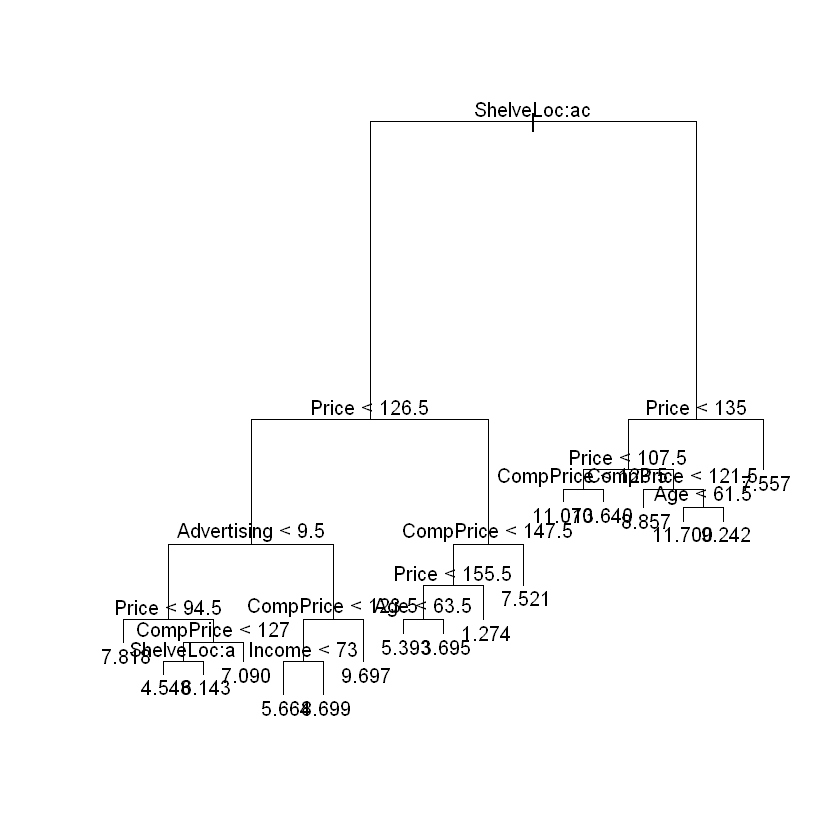

In [16]:
# Fitting a regression tree
tree.Carseats <- tree(Sales~.,train)
plot(tree.Carseats)
text(tree.Carseats)

In [17]:
# test MSE
yhat <- predict(tree.Carseats, test)
TestMSE <- mean((yhat-test$Sales)^2)
TestMSE

[1] 5.207429

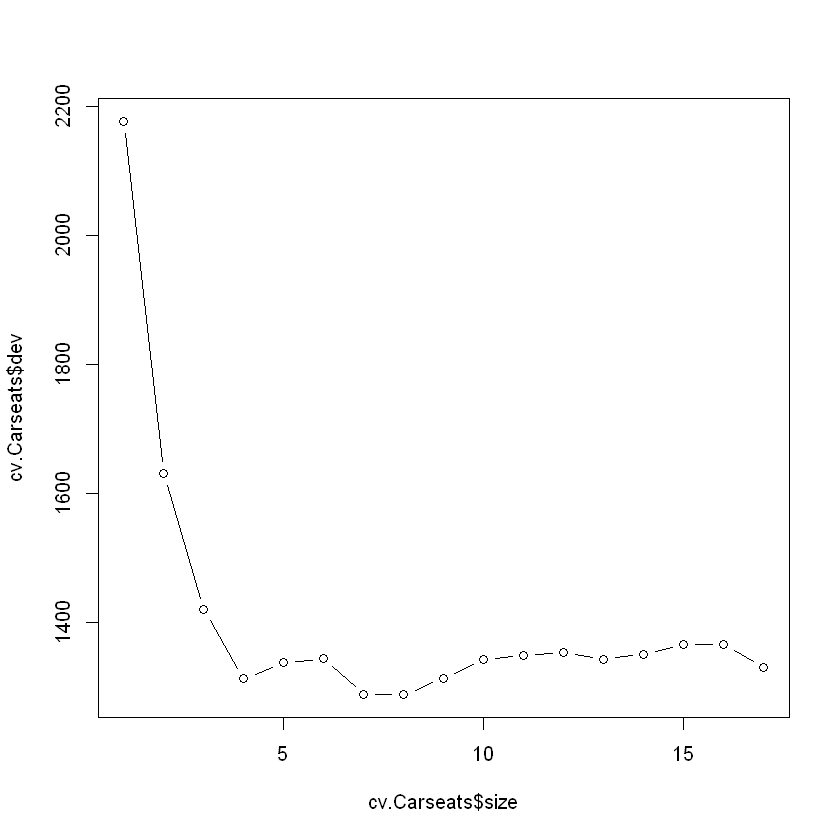

In [18]:
# (c)
set.seed(3)
cv.Carseats = cv.tree(tree.Carseats)
plot(cv.Carseats$size, cv.Carseats$dev, type = "b")
# Best at 7

In [19]:
prune.Carseats = prune.tree(tree.Carseats, best = 7)

In [20]:
yhatPrune <- predict(prune.Carseats, test)
PruneTestMSE <- mean((yhatPrune - test$Sales)^2)
PruneTestMSE
# Pruning the tree worsens the MSE

[1] 5.930727

In [21]:
# (d)
library(randomForest)
set.seed(1)
bag.Carseats <- randomForest(Sales~.,train,mtry=10,importance=TRUE)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [22]:
yhatBag <- predict(bag.Carseats,test)
BagTestMSE <- mean((yhatBag-test$Sales)^2)
BagTestMSE

[1] 2.754573

In [23]:
importance(bag.Carseats)

,%IncMSE,IncNodePurity
CompPrice,31.9460151,262.878292
Income,13.6600504,135.981962
Advertising,25.9115503,201.420764
Population,5.5553037,78.247079
Price,61.7965863,557.411266
ShelveLoc,76.6678350,644.860609
Age,12.0667144,137.948410
Education,1.0206376,52.455294
Urban,0.8069492,10.570858
US,2.4165432,7.955913


In [24]:
# (e)
set.seed(1)
rf.Carseats1 <- randomForest(Sales~.,train,mtry=6,importance=TRUE)
rf.Carseats2 <- randomForest(Sales~.,train,mtry=7,importance=TRUE)
rf.Carseats3 <- randomForest(Sales~.,train,mtry=8,importance=TRUE)

yhatrf1 <- predict(rf.Carseats1,test)
rfMSE1 <- mean((yhatrf1-test$Sales)^2)
print(rfMSE1)

yhatrf2 <- predict(rf.Carseats2,test)
rfMSE2 <- mean((yhatrf2-test$Sales)^2)
print(rfMSE2)

yhatrf3 <- predict(rf.Carseats3,test)
rfMSE3 <- mean((yhatrf3-test$Sales)^2)
print(rfMSE3)
## the more m there are, the better and lower the MSE becomes

[1] 2.912504
[1] 2.837537
[1] 2.75628


In [25]:
# importance for the lowest MSE
importance(rf.Carseats3)

,%IncMSE,IncNodePurity
CompPrice,30.132823,247.959109
Income,11.639691,138.092335
Advertising,24.710565,225.463602
Population,3.058966,86.842307
Price,62.616855,538.902576
ShelveLoc,72.964756,626.025490
Age,12.902685,149.335234
Education,1.877156,57.444159
Urban,-2.198612,10.841307
US,3.493485,9.330787


#### Exercise 9 p334

In [26]:
# (a)
attach(OJ)
set.seed(2)
OJsplitTrain <- sample(1:nrow(OJ), 800)
OJtrain <- OJ[OJsplitTrain,]
OJtest <- OJ[-OJsplitTrain,]

In [27]:
# (b)
# Fitting a regression tree
tree.OJ <- tree(Purchase~.,OJtrain)
summary(tree.OJ)
## The training error rate is 15%
## There are 9 terminal nodes


Classification tree:
tree(formula = Purchase ~ ., data = OJtrain)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  9 
Residual mean deviance:  0.7009 = 554.4 / 791 
Misclassification error rate: 0.1588 = 127 / 800 

In [28]:
# (c)
tree.OJ
## On branch 8, LoyalCH < 0.03 is a terminal node, observations are MM

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1068.00 CH ( 0.61250 0.38750 )  
   2) LoyalCH < 0.5036 359  422.80 MM ( 0.27577 0.72423 )  
     4) LoyalCH < 0.280875 172  127.60 MM ( 0.12209 0.87791 )  
       8) LoyalCH < 0.035047 56   10.03 MM ( 0.01786 0.98214 ) *
       9) LoyalCH > 0.035047 116  106.60 MM ( 0.17241 0.82759 ) *
     5) LoyalCH > 0.280875 187  254.10 MM ( 0.41711 0.58289 )  
      10) PriceDiff < 0.05 73   71.36 MM ( 0.19178 0.80822 ) *
      11) PriceDiff > 0.05 114  156.30 CH ( 0.56140 0.43860 ) *
   3) LoyalCH > 0.5036 441  311.80 CH ( 0.88662 0.11338 )  
     6) LoyalCH < 0.737888 168  191.10 CH ( 0.74405 0.25595 )  
      12) PriceDiff < 0.265 93  125.00 CH ( 0.60215 0.39785 )  
        24) PriceDiff < -0.35 12   10.81 MM ( 0.16667 0.83333 ) *
        25) PriceDiff > -0.35 81  103.10 CH ( 0.66667 0.33333 ) *
      13) PriceDiff > 0.265 75   41.82 CH ( 0.92000 0.08000 ) *
     7) LoyalCH > 0.737888 273   65.11 CH ( 0.97436 

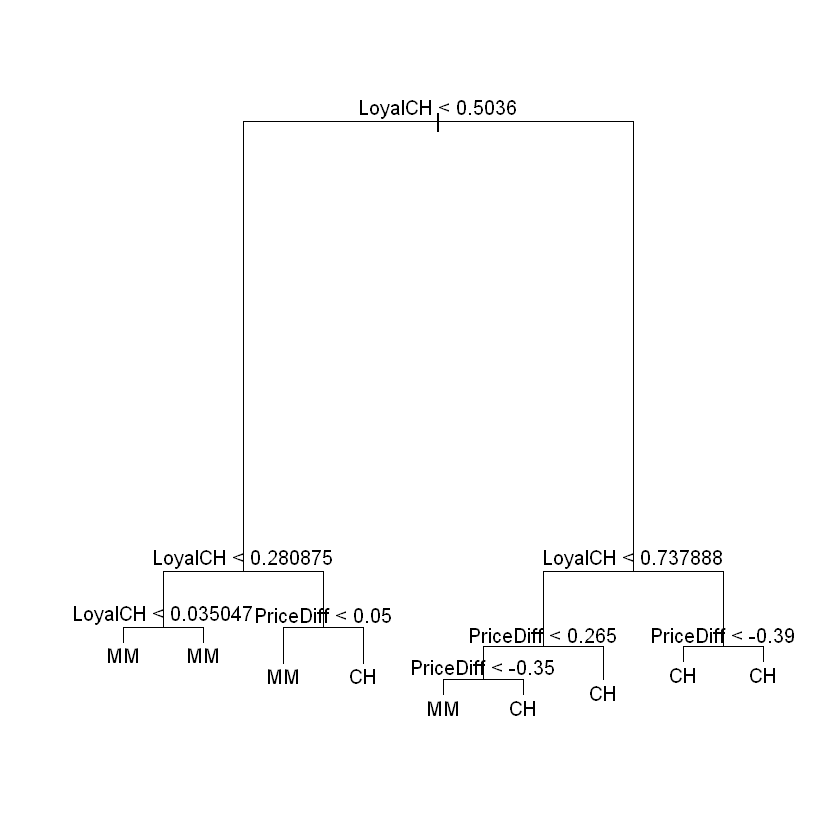

In [29]:
# (d) 
plot(tree.OJ)
text(tree.OJ,pretty=0)
## The tree has 9 leaves, 8 terminal nodes, and 16 branches

In [30]:
# (e)
OJyhat <- predict(tree.OJ, OJtest, type="class")
CM <- table(OJyhat,OJtest$Purchase)
CM

      
OJyhat  CH  MM
    CH 148  37
    MM  15  70

In [31]:
# (f)
set.seed(3)
cv.OJ = cv.tree(tree.OJ)

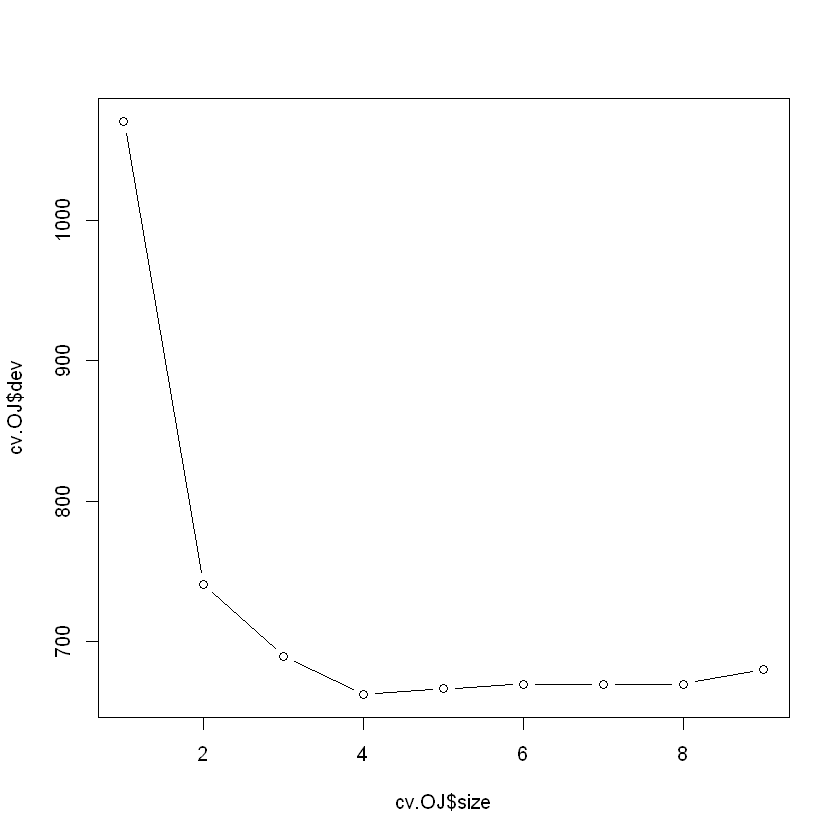

In [32]:
# (g)
plot(cv.OJ$size, cv.OJ$dev, type = "b")

In [33]:
# (h)
# Optimal tree size : 4

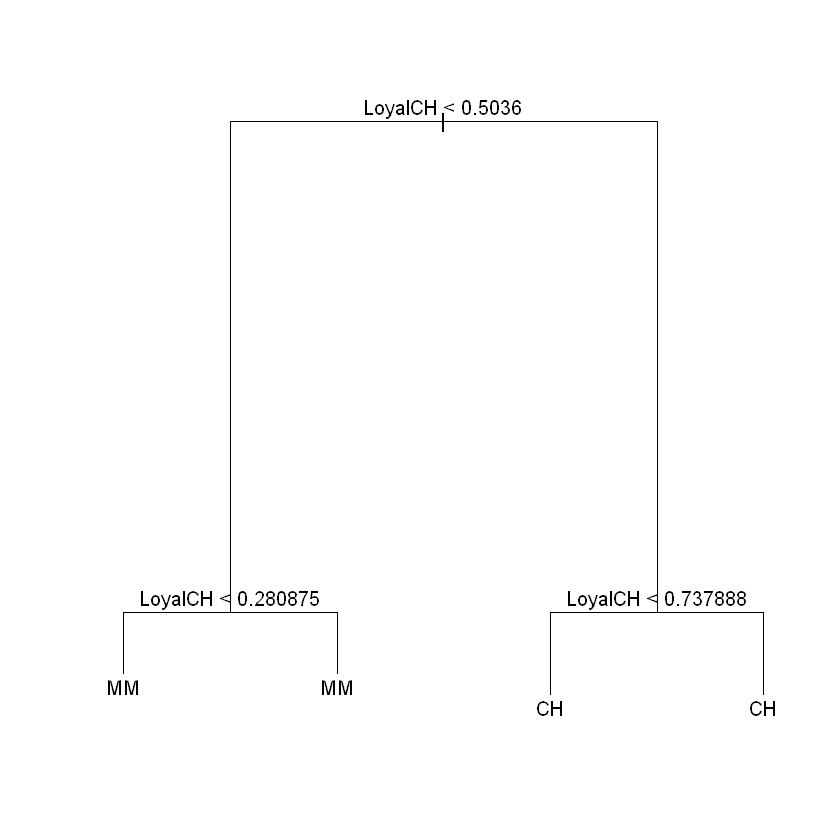

In [34]:
# (i)
prune.OJ = prune.tree(tree.OJ, best = 4)
plot(prune.OJ)
text(prune.OJ)

In [35]:
#(j)
# Unpruned : training error rate
summary(tree.OJ)
# Misclassification error rate : 0.1588 = 127 / 800 


Classification tree:
tree(formula = Purchase ~ ., data = OJtrain)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  9 
Residual mean deviance:  0.7009 = 554.4 / 791 
Misclassification error rate: 0.1588 = 127 / 800 

In [36]:
# Pruned : training error rate
summary(prune.OJ)
# Misclassification error rate : 0.1862 = 149 / 800


Classification tree:
snip.tree(tree = tree.OJ, nodes = c(7L, 4L, 6L, 5L))
Variables actually used in tree construction:
[1] "LoyalCH"
Number of terminal nodes:  4 
Residual mean deviance:  0.8014 = 637.9 / 796 
Misclassification error rate: 0.1862 = 149 / 800 

In [37]:
# The unprunned training error rate is lower

In [41]:
# (k)
# Unpruned : testing error rate
pred.unprunedOJ = predict(tree.OJ, OJtest, type = "class")
misclass.unprunedOJ = sum(OJtest$Purchase != pred.unprunedOJ)
misclass.unprunedOJ/length(pred.unprunedOJ)

[1] 0.1925926

In [39]:
# Pruned : testing error rate
pred.prunedOJ = predict(tree.OJ, OJtest, type = "class")
misclass.prunedOJ = sum(OJtest$Purchase != pred.prunedOJ)
misclass.prunedOJ/length(pred.unprunedOJ)

[1] 0.1925926

In [42]:
# The 2 rates are identical